# Quantum Teleportaion circuit

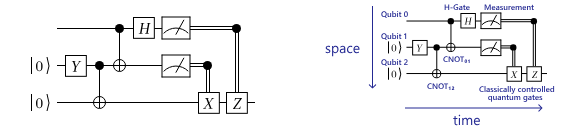

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [19]:
# Create a quantum circuit with three qubits and three classical bits
qc = QuantumCircuit(3, 3)

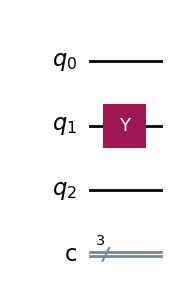

In [20]:
# Apply the Y gate to qubit 1 to prepare the state
qc.y(1)
qc.draw('mpl')

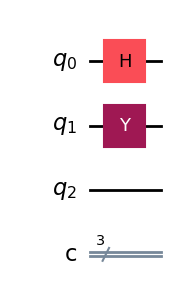

In [21]:
# Apply the Hadamard gate to qubit 0
qc.h(0)
qc.draw('mpl')

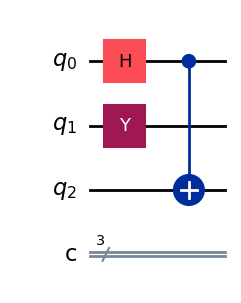

In [22]:
# Apply a CNOT gate with qubit 0 as control and qubit 2 as target
qc.cx(0, 2)
qc.draw('mpl')

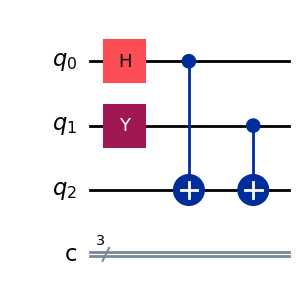

In [23]:
# Apply a CNOT gate with qubit 1 as control and qubit 2 as target
qc.cx(1, 2)
qc.draw('mpl')

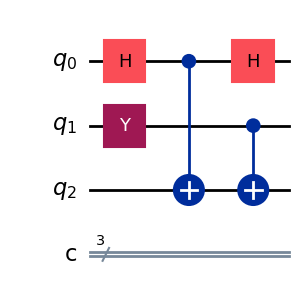

In [24]:
# Apply a Hadamard gate to qubit 0
qc.h(0)
qc.draw('mpl')

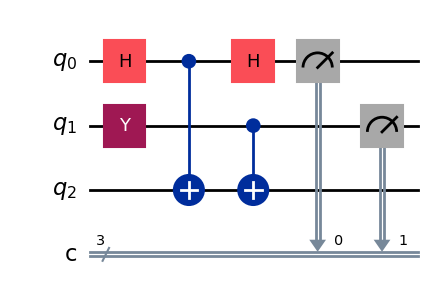

In [25]:
# Measure qubits 0 and 1
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw('mpl')

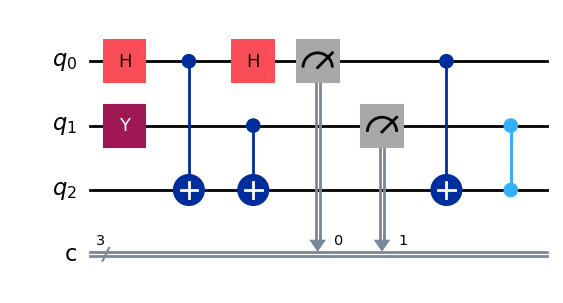

In [26]:
# Apply classically controlled X and Z gates
qc.cx(0, 2)
qc.cz(1, 2)
qc.draw('mpl')

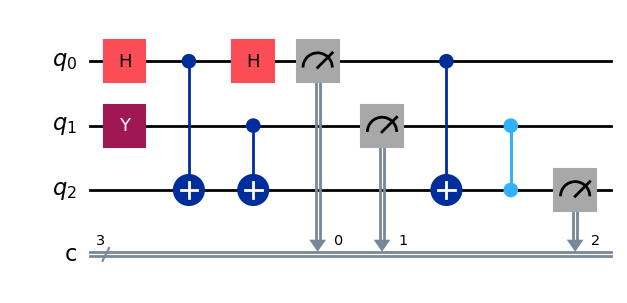

In [27]:
# Measure qubit 2
qc.measure(2, 2)
qc.draw('mpl')

In [28]:
# Simulate the circuit using the qasm simulator
backend = Aer.get_backend('qasm_simulator')

compiled_circuit = transpile(qc, backend)
job = backend.run(compiled_circuit, shots=1024)

In [29]:
# Get the result of the simulation
result = job.result()

In [30]:
# Get and plot the results
counts = result.get_counts(qc)
print("Measurement results:", counts)

Measurement results: {'110': 239, '010': 284, '011': 240, '111': 261}


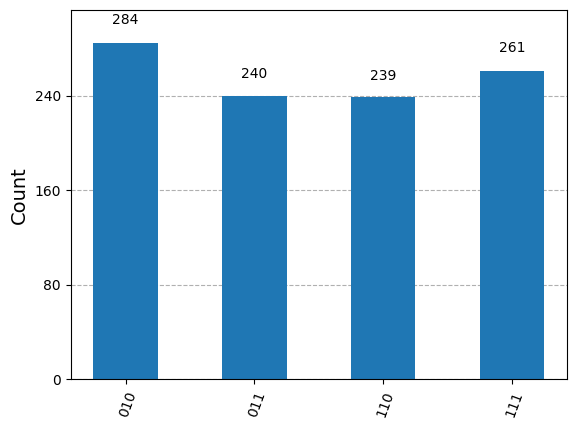

In [31]:
plot_histogram(counts)

In [32]:
# Convert shots to probabilities

total_shots = sum(counts.values())
probabilities = {outcome: count/total_shots for outcome, count in counts.items()}
probabilities

{'110': 0.2333984375, '010': 0.27734375, '011': 0.234375, '111': 0.2548828125}

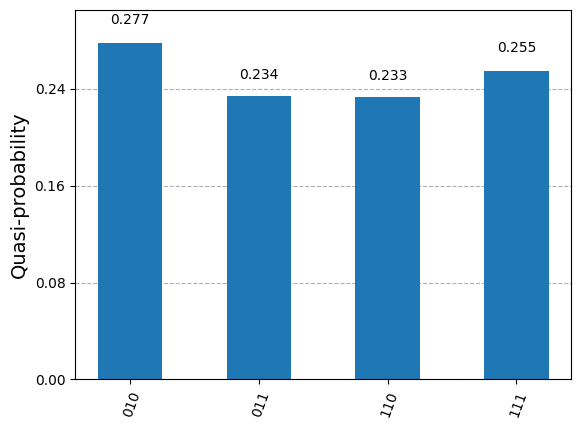

In [33]:
plot_histogram(probabilities)